In [1]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import mmd

In [3]:
#linear
from sklearn import linear_model
#DL model
from sklearn.neural_network import MLPRegressor
#kernel regression
from sklearn.kernel_ridge import KernelRidge

In [4]:
#MSE and NSE
def MSE(x,y):
    return np.sqrt(np.mean(np.square(x-y)))

def NSE(pre,tar):
    a=np.sum(np.square(pre-tar))/np.sum(np.square(tar-np.mean(tar)))
    return 1-a

In [5]:
#Prepare training data (set0)
df_s0 = pd.read_excel(r'./save_data/excelfile/rain0_set0_state_data.xlsx')
df_a0= pd.read_excel(r'./save_data/excelfile/rain0_set0_action_data.xlsx')
df_r0= pd.read_excel(r'./save_data/excelfile/rain0_set0_rain_data.xlsx')
dt_s0=df_s0.values[:,1:]
dt_a0=df_a0.values[:,1:]
dt_r0=df_r0.values[:,1:]

data=np.concatenate((dt_s0,dt_a0,dt_r0),axis=1)
        
for it in range(3):
    for jt in [0,2]:   
        df_s0 = pd.read_excel(r'./save_data/excelfile/rain'+str(it)+'_set'+str(jt)+'_state_data.xlsx')
        df_a0= pd.read_excel(r'./save_data/excelfile/rain'+str(it)+'_set'+str(jt)+'_action_data.xlsx')
        df_r0= pd.read_excel(r'./save_data/excelfile/rain'+str(it)+'_set'+str(jt)+'_rain_data.xlsx')
        dt_s0=df_s0.values[:,1:]
        dt_a0=df_a0.values[:,1:]
        dt_r0=df_r0.values[:,1:]
        tem=np.concatenate((dt_s0,dt_a0,dt_r0),axis=1)
        data=np.concatenate((data,tem),axis=0)
print(data.shape)

#Prepare test1 data
df_s0 = pd.read_excel(r'./save_data/excelfile/rain0_set1_state_data.xlsx')
df_a0= pd.read_excel(r'./save_data/excelfile/rain0_set1_action_data.xlsx')
df_r0= pd.read_excel(r'./save_data/excelfile/rain0_set1_rain_data.xlsx')
dt_s0=df_s0.values[:,1:]
dt_a0=df_a0.values[:,1:]
dt_r0=df_r0.values[:,1:]
data_test1=[]
data_test1.append(np.concatenate((dt_s0,dt_a0,dt_r0),axis=1))
        
for it in [0,2,3,4,5,6,7,8,9]:
    for jt in [1]:   
        df_s0 = pd.read_excel(r'./save_data/excelfile/rain'+str(it)+'_set'+str(jt)+'_state_data.xlsx')
        df_a0= pd.read_excel(r'./save_data/excelfile/rain'+str(it)+'_set'+str(jt)+'_action_data.xlsx')
        df_r0= pd.read_excel(r'./save_data/excelfile/rain'+str(it)+'_set'+str(jt)+'_rain_data.xlsx')
        dt_s0=df_s0.values[:,1:]
        dt_a0=df_a0.values[:,1:]
        dt_r0=df_r0.values[:,1:]
        tem=np.concatenate((dt_s0,dt_a0,dt_r0),axis=1)
        data_test1.append(tem)

(336, 13)


# 5.1 Results

# 十场降雨有三组不同控制序列，其中十场降雨的第一组控制用于训练，其余用于测试

In [6]:
X_train=data[:data.shape[0]-2,:]
Y_train=data[1:data.shape[0]-1,:]
print(X_train.shape,Y_train.shape)

(334, 13) (334, 13)


# Train

In [20]:
#linear
reg = linear_model.LassoLars(alpha=0.1)
reg.fit(X_train,Y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [25]:
#DLEDMD
DL = MLPRegressor(hidden_layer_sizes=(10,10,10,4),  activation='identity', alpha=0.1, batch_size='auto',
                  power_t=0.5, max_iter=50000,epsilon=1e-08)
DL.fit(X_train,Y_train)

MLPRegressor(activation='identity', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10, 4), learning_rate='constant',
             learning_rate_init=0.001, max_iter=50000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [34]:
#KEDMD
KRR = KernelRidge(kernel='additive_chi2')
KRR.fit(X_train, Y_train)

C:\Users\chong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='additive_chi2',
            kernel_params=None)

In [35]:
#Prediction 3 rainfall for testing
Linear,DLEDMD,KEDMD,SWMM=[],[],[],[]
for i in range(5):
    #X_test, Y_test=data_test1[rainlog][:46,:],data_test1[0][1:47,:]
    X_test=data_test1[i][:46,:]
    Y_test=data_test1[i][1:47,:]
    
    print('Rain number:',i)
    #KEDMD
    Y_K=KRR.predict(X_test)
    
    print('KEDMD:')
    if i!=1:
        print('MSE:',MSE(Y_K,Y_test),'  NSE:',NSE(Y_K,Y_test))
    #DLEDMD
    Y_dl=DL.predict(X_test)
    print('DLEDMD:')
    if i!=1:
        print('MSE:',MSE(Y_dl,Y_test),'  NSE:',NSE(Y_dl,Y_test))

    #linear
    Y_l=reg.predict(X_test)
    print('Reg:')
    if i!=1:
        print('MSE:',MSE(Y_l,Y_test),'  NSE:',NSE(Y_l,Y_test))
    
    Linear.append(Y_l)
    DLEDMD.append(Y_dl)
    KEDMD.append(Y_K)
    SWMM.append(Y_test)

Rain number: 0
KEDMD:
MSE: 0.9345815793262555   NSE: 0.9936256901729519
DLEDMD:
MSE: 1.0952979765236   NSE: 0.9912448557507888
Reg:
MSE: 1.5155575770118794   NSE: 0.9832373137824397
Rain number: 1
KEDMD:
DLEDMD:
Reg:
Rain number: 2
KEDMD:
MSE: 1.1386463943978846   NSE: 0.9893620719060723
DLEDMD:
MSE: 1.1436796267992069   NSE: 0.9892678169999172
Reg:
MSE: 1.445288279250622   NSE: 0.9828608901881356
Rain number: 3
KEDMD:
MSE: 1.0759968255543908   NSE: 0.9914074738966218
DLEDMD:
MSE: 1.1129977359690337   NSE: 0.9908063611009736
Reg:
MSE: 1.4765395726073034   NSE: 0.9838196071453967
Rain number: 4
KEDMD:
MSE: 1.2003805792729267   NSE: 0.9717231829498935
DLEDMD:
MSE: 1.1691115953092401   NSE: 0.9731771737198608
Reg:
MSE: 1.3081858809352507   NSE: 0.9664160699882159


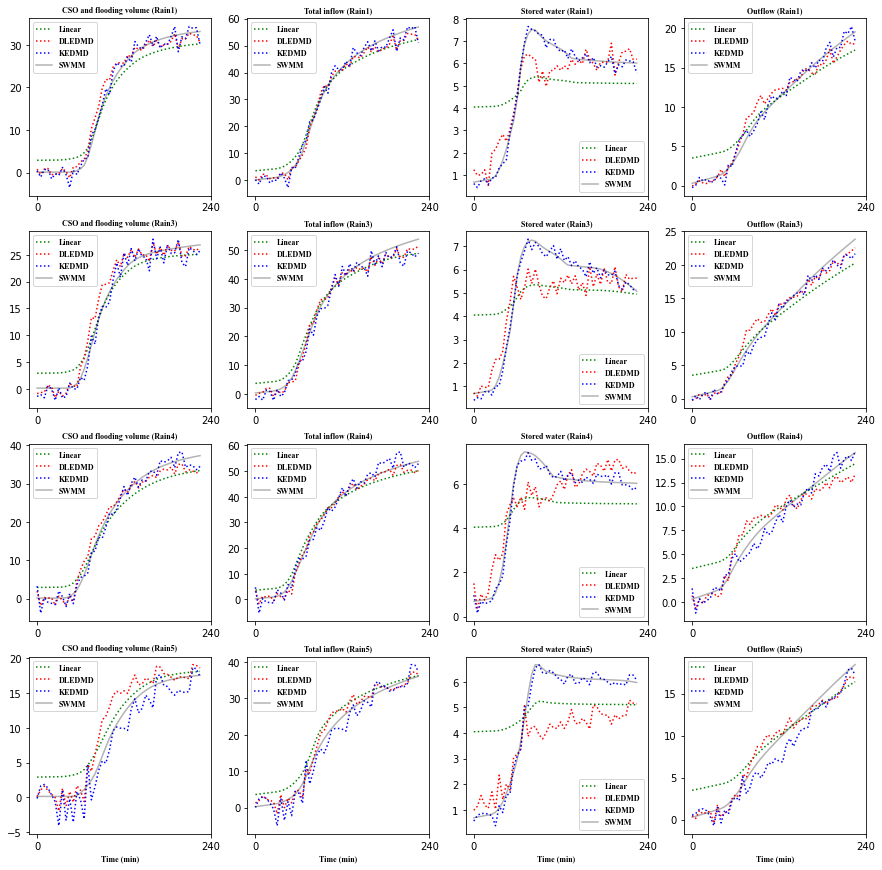

In [38]:
font1 = {'family' : 'Times New Roman',
         'weight' : 'normal',
         'size'   : 8,}

font2 = {'family' : 'Times New Roman',
         'weight' : 'normal',
         'size'   : 8,}


fig = plt.figure(figsize=(15,15))

#5场降雨，每场降雨4个变量

it=0
i=0
titles=['CSO and flooding volume','Total inflow','Stored water','Outflow']
Rains=['Rain1','Rain2','Rain3','Rain4','Rain5']

for j in range(5):
    if j!=1:
        plts=fig.add_subplot(4,4,it+1)
        plt.plot(Linear[j][:,i],'g:',label='Linear')
        plt.plot(DLEDMD[j][:,i],'r:',label='DLEDMD')
        plt.plot(KEDMD[j][:,i],'b:',label='KEDMD')
        plt.plot(SWMM[j][:,i],'k',label='SWMM',alpha=0.3)
        plt.legend(prop=font2)
        plt.xticks([0,48],['0','240'])
        if j==4:
            plt.xlabel('Time (min)',fontdict=font1)
        plt.title(titles[i]+' ('+Rains[j]+')',fontdict=font1)
        it+=1
        i+=1

        plts=fig.add_subplot(4,4,it+1)
        plt.plot(Linear[j][:,i],'g:',label='Linear')
        plt.plot(DLEDMD[j][:,i],'r:',label='DLEDMD')
        plt.plot(KEDMD[j][:,i],'b:',label='KEDMD')
        plt.plot(SWMM[j][:,i],'k',label='SWMM',alpha=0.3)
        plt.legend(prop=font2)
        plt.xticks([0,48],['0','240'])
        if j==4:
            plt.xlabel('Time (min)',fontdict=font1)
        plt.title(titles[i]+' ('+Rains[j]+')',fontdict=font1)
        it+=1
        i+=1

        plts=fig.add_subplot(4,4,it+1)
        plt.plot(Linear[j][:,i],'g:',label='Linear')
        plt.plot(DLEDMD[j][:,i],'r:',label='DLEDMD')
        plt.plot(KEDMD[j][:,i],'b:',label='KEDMD')
        plt.plot(SWMM[j][:,i],'k',label='SWMM',alpha=0.3)
        plt.legend(prop=font2)
        plt.xticks([0,48],['0','240'])
        if j==4:
            plt.xlabel('Time (min)',fontdict=font1)
        plt.title(titles[i]+' ('+Rains[j]+')',fontdict=font1)
        it+=1
        i+=1

        plts=fig.add_subplot(4,4,it+1)
        plt.plot(Linear[j][:,i],'g:',label='Linear')
        plt.plot(DLEDMD[j][:,i],'r:',label='DLEDMD')
        plt.plot(KEDMD[j][:,i],'b:',label='KEDMD')
        plt.plot(SWMM[j][:,i],'k',label='SWMM',alpha=0.3)
        plt.legend(prop=font2)
        plt.xticks([0,48],['0','240'])
        if j==4:
            plt.xlabel('Time (min)',fontdict=font1)
        plt.title(titles[i]+' ('+Rains[j]+')',fontdict=font1)
        it+=1
        i=0

fig.savefig('5.1.png', bbox_inches='tight', dpi=500)   

In [37]:
for j in range(5):
    if j!=1:
        pd.DataFrame(Linear[j][:,:4]).to_excel('./results/Linear'+str(j)+'.xlsx', index=False)
        pd.DataFrame(DLEDMD[j][:,:4]).to_excel('./results/DLEDMD'+str(j)+'.xlsx', index=False)
        pd.DataFrame(KEDMD[j][:,:4]).to_excel('./results/KEDMD'+str(j)+'.xlsx', index=False)
        pd.DataFrame(SWMM[j][:,:4]).to_excel('./results/SWMM'+str(j)+'.xlsx', index=False)